In [8]:
import qutip as qt
from qutip import Bloch, QobjEvo, basis, sesolve, sigmay, sigmaz
import numpy as np
import math
import cmath
import matplotlib.pyplot as plt
from scipy.constants import h, e
# Many-Body Operators
def SX(N, k):
    """Create a sigma_X operator at position k from
    a Hilbert space of N qubits
    """
    L = [qt.qeye(2)]*N 
    L[k] = qt.sigmax()
    return qt.tensor(L)

def SY(N, k):
    """Create a sigma_Y operator at position k from
    a Hilbert space of N qubits
    """
    L = [qt.qeye(2)]*N
    L[k] = qt.sigmay()
    return qt.tensor(L)

def SZ(N, k):
    """Create a sigma_Z operator at position k from
    a Hilbert space of N qubits
    """
    L = [qt.qeye(2)]*N
    L[k] = qt.sigmaz()
    return qt.tensor(L)


from qutip import create, destroy
# Many-Body Operators
def Sm(N, k):
    """Create a sigma_X operator at position k from
    a Hilbert space of N qubits
    """
    L = [qt.qeye(2)]*N 
    L[k] = destroy(2)
    return qt.tensor(L)

def Sp(N, k):
    """Create a sigma_X operator at position k from
    a Hilbert space of N qubits
    """
    L = [qt.qeye(2)]*N 
    L[k] = create(2)
    return qt.tensor(L)

#------------------------------------------------------------------------------



In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Strength of the Rabi-rate in GHz.
r = 0.5932099370933486 #0.1

# Frequency of the qubit transition in GHz.
w = 29.12676937326181 #5.

dt = 1 / 4.5

# Define gaussian envelope function to approximately implement an sx gate.
amp = 0.2 #1. / 1.75
sigma = 64 #0.6985/r/amp
T = 4*sigma
duration = 256 #int(T / dt)
beta = 3.279359125685733


# Definir el rango de tiempo x
t = np.arange(0, duration*dt, dt)

# Definir g(x)
g_x = np.exp(-((t - duration*dt/2) ** 2) / (2 * sigma ** 2))
g_m1 = np.exp(-((-1 - duration*dt/2) ** 2) / (2 * sigma ** 2))
# Definir g'(x)
g_prime_x = amp*(g_x-g_m1)/(1-g_m1)



# Definir f(x)
f_x = g_prime_x * (1 + 1j * beta * (- (t - duration*dt / 2) / sigma ** 2))




In [10]:
w/(2*np.pi)

4.635669322052244

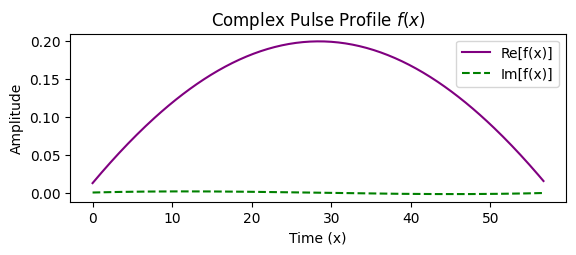

In [11]:
# Graficar el pulso resultante f(x) (real e imaginario)
plt.subplot(2, 1, 2)
plt.plot(t, f_x.real, label="Re[f(x)]", color='purple')
plt.plot(t, f_x.imag, label="Im[f(x)]", linestyle='dashed', color='green')
plt.xlabel("Time (x)")
plt.ylabel("Amplitude")
plt.title("Complex Pulse Profile $f(x)$")
plt.legend()

In [12]:
N = 1
H0 = 2*np.pi*w * SZ(N, 0)
f1 = np.ones(len(t))
Ht = [[SX(N,0), r*f_x/4]]
s0 = qt.basis(2, 0)
s1 = qt.basis(2, 1)

psi0 = s1
for _ in range(N - 1):
    psi0= qt.tensor(psi0, s1) # initial condition, all qubits in down state

result = sesolve(Ht, psi0, t)



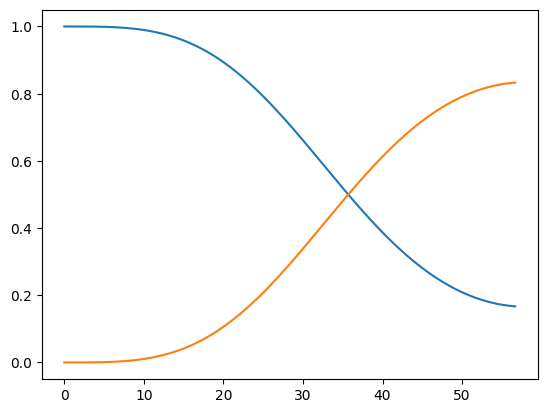

In [14]:
probabilitiess0 = [abs((s0.dag() * state))**2 for state in result.states] #quitar el norm
probabilitiess1 = [abs((s1.dag() * state))**2 for state in result.states] #quitar el norm
plt.plot(t,probabilitiess1)
plt.plot(t,probabilitiess0)


In [15]:
t_min = t[np.argmin(probabilitiess1)]
t_min

56.666666666666664